In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math
from scipy.optimize import minimize
import scipy.stats as ss
from scipy.signal import find_peaks 
from matplotlib import rc
from scipy.optimize import fsolve

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#en figur der fylder en kolonne har bredde 5,8, f.eks: fig, ax= plt.subplots(figsize=(5.8,4))
#en figur der fylder to kolonner har dobbeltbredde??

In [3]:
import ROOT as root

Welcome to JupyROOT 6.24/06


In [4]:
from platform import python_version

In [5]:
python_version()

'3.8.10'

In [19]:
f = root.TFile("analyzed/N1034gv.root")
myTree = f.Get("a")

cmEs = []
angleDiffs = []
timeDiffs = []
pCM = []
j=0

nEntries = myTree.GetEntries()

for entry in myTree:
    mul = entry.mul
    for i in range(mul):
        currentE = entry.cmE[i]
        currentAlpha = entry.canBeAlpha[i]
        if(currentAlpha == 1):
            cmEs.append(currentE)
            angleDiffs.append(entry.angDiff[i])
            timeDiffs.append(entry.timeDiff[i])
            pCM.append(entry.pCM[i])
            
    j += 1
    if(j%100000 == 0):
        print(j/nEntries)

0.36628694919600013
0.7325738983920003


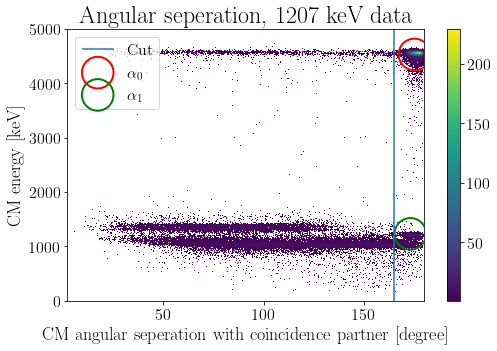

In [62]:
fig, ax = plt.subplots(figsize = [8,5])
hist = ax.hist2d(angleDiffs,cmEs,bins = [1000,1000], cmin = 1)
fig.colorbar(hist[3], ax=ax)
ax.set_ylim(0,5000)
ax.set_title('Angular seperation, 1207 keV data')
ax.set_xlabel('CM angular seperation with coincidence partner [degree]')
ax.set_ylabel('CM energy [keV]')
ax.vlines(165,0,5000, label = 'Cut')

ax.scatter(175,4530,s=1000,facecolors='none', edgecolors='r', linewidth = 2, label = r'$\alpha_0$')
ax.scatter(173,1230,s=1000,facecolors='none', edgecolors='g', linewidth = 2, label = r'$\alpha_1$')

ax.legend()
#plt.savefig('txtHists/angsep.png', bbox_inches = 'tight')

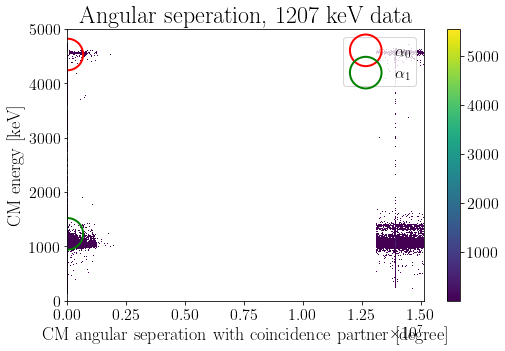

In [63]:
fig, ax = plt.subplots(figsize = [8,5])
hist = ax.hist2d(timeDiffs,cmEs,bins = [1000,1000], cmin = 1)
fig.colorbar(hist[3], ax=ax)
ax.set_ylim(0,5000)
ax.set_title('Angular seperation, 1207 keV data')
ax.set_xlabel('CM angular seperation with coincidence partner [degree]')
ax.set_ylabel('CM energy [keV]')
#ax.vlines(165,0,5000, label = 'Cut')

ax.scatter(175,4530,s=1000,facecolors='none', edgecolors='r', linewidth = 2, label = r'$\alpha_0$')
ax.scatter(173,1230,s=1000,facecolors='none', edgecolors='g', linewidth = 2, label = r'$\alpha_1$')

ax.legend()
#plt.savefig('txtHists/timesep.png', bbox_inches = 'tight')

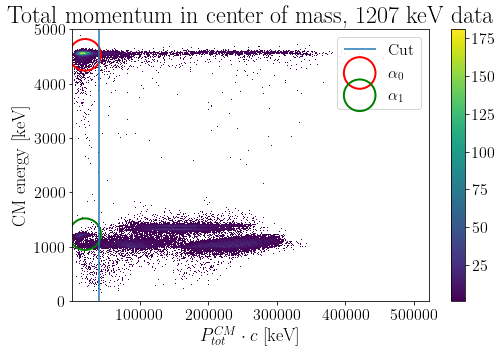

In [77]:
fig, ax = plt.subplots(figsize = [8,5])
hist = ax.hist2d(pCM,cmEs,bins = [1000,1000], cmin = 1)
fig.colorbar(hist[3], ax=ax)
ax.set_ylim(0,5000)
ax.set_title('Total momentum in center of mass, 1207 keV data')
ax.set_xlabel('$P^{CM}_{tot} \cdot c$ [keV]')
ax.set_ylabel('CM energy [keV]')
ax.vlines(40000,0,5000, label = 'Cut')

ax.scatter(20000,4530,s=1000,facecolors='none', edgecolors='r', linewidth = 2, label = r'$\alpha_0$')
ax.scatter(20000,1230,s=1000,facecolors='none', edgecolors='g', linewidth = 2, label = r'$\alpha_1$')

ax.legend()
#plt.savefig('txtHists/cmPsep.png', bbox_inches = 'tight')